<a href="https://colab.research.google.com/github/youngha-Ju/gong_gong_bigdata_mulcam/blob/main/buffer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
!pip install geopandas

In [66]:
%cd '/content/drive/MyDrive/Colab Notebooks/new_project'

/content/drive/MyDrive/Colab Notebooks/new_project


In [67]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from matplotlib import font_manager 
import folium
from folium import GeoJson

In [68]:
# !apt-get updata -qq
# !apt-get install fonts-nanum* -qq
# font_manager._rebuild()

In [69]:
boundary = gpd.read_file('../big/HangJeongDong_ver20210401.geojson')
sang = pd.read_csv('소상공인시장진흥공단_상가(상권)정보_서울_202106.csv')
child_zone = pd.read_csv('./보호구역, 보안등/서울특별시_서초구_어린이보호구역.csv', encoding='cp949')
light = pd.read_csv('./보호구역, 보안등/서울특별시_서초구_보안등정보.csv', encoding = 'cp949')
school = pd.read_csv('한국교원대학교_초중고등학교위치.csv', encoding='cp949')
smoking_place = pd.read_csv('흡연구역_전처리_수작업포함.csv', encoding='cp949')

In [70]:
smoking_place[smoking_place.자치구명 == '서초구']

,구분,주소,설치위치,자치구명,위도,경도,흡연실 개수
473,개방형흡연부스,미기재,사당역 2번 출구와 3번 출구 사이 보도,서초구,37.47552,126.9819,미기재
474,개방형흡연부스,미기재,강남역 7번 출구와 8번출구 사이 보도 서초동 1319-5 앞,서초구,37.49736,127.02745,미기재
475,개방형흡연부스,미기재,방배역3번출구 먹자골목 입구방배동 910-9 옆,서초구,37.482,126.99708,미기재
476,개방형흡연부스,미기재,방배천복개도로 명동칼국수방배동 450-14 앞,서초구,37.47763,126.98288,미기재
477,개방형흡연부스,미기재,서초대로 78길 24 서초동 1327-5 스타벅스 앞,서초구,37.49552,127.02788,미기재
478,개방형흡연부스,미기재,서초대로 78길 42 서초동 1330-18 현대기림오피스텔 앞,서초구,37.49404,127.02835,미기재
479,개방형흡연부스,미기재,원지동 23서초종합체육센터 입구),서초구,37.45904,127.04198,미기재
480,개방형흡연부스,미기재,방배동 438-38(서울시공공자전거 수서센터 앞),서초구,37.48397,126.9824,미기재
481,개방형흡연부스,미기재,방배천복개도로 방배경찰서방배동 455-10 앞,서초구,37.48148,126.98296,미기재
482,개방형흡연부스,미기재,방배천복개도로 그린골프장방배동 452-1 앞,서초구,37.47879,126.98262,미기재


In [71]:
boundary_seocho = boundary[boundary.sggnm == '서초구']
boundary_seocho

,OBJECTID,adm_nm,adm_cd,adm_cd2,sgg,sido,sidonm,sggnm,geometry
339,340,서울특별시 서초구 서초1동,1122051,1165051000,11650,11,서울특별시,서초구,"MULTIPOLYGON (((127.02701 37.48051, 127.02551 ..."
340,341,서울특별시 서초구 서초2동,1122052,1165052000,11650,11,서울특별시,서초구,"MULTIPOLYGON (((127.03162 37.48954, 127.03378 ..."
341,342,서울특별시 서초구 서초3동,1122053,1165053000,11650,11,서울특별시,서초구,"MULTIPOLYGON (((127.01576 37.49432, 127.01402 ..."
342,343,서울특별시 서초구 서초4동,1122054,1165053100,11650,11,서울특별시,서초구,"MULTIPOLYGON (((127.02764 37.49796, 127.02128 ..."
343,344,서울특별시 서초구 잠원동,1122055,1165054000,11650,11,서울특별시,서초구,"MULTIPOLYGON (((127.01944 37.51599, 127.01986 ..."
344,345,서울특별시 서초구 반포본동,1122056,1165055000,11650,11,서울특별시,서초구,"MULTIPOLYGON (((126.98938 37.51271, 126.99024 ..."
345,346,서울특별시 서초구 반포1동,1122057,1165056000,11650,11,서울특별시,서초구,"MULTIPOLYGON (((127.02447 37.50457, 127.02450 ..."
346,347,서울특별시 서초구 반포2동,1122058,1165057000,11650,11,서울특별시,서초구,"MULTIPOLYGON (((127.00093 37.50527, 127.00290 ..."
347,348,서울특별시 서초구 반포3동,1122059,1165058000,11650,11,서울특별시,서초구,"MULTIPOLYGON (((127.01162 37.50831, 127.00975 ..."
348,349,서울특별시 서초구 반포4동,1122060,1165058100,11650,11,서울특별시,서초구,"MULTIPOLYGON (((127.01238 37.49937, 127.01245 ..."


In [72]:
light = light.dropna(axis=0, subset=['위도'])
light = light.drop_duplicates(subset=['위도', '경도'])
light

,보안등위치명,설치개수,소재지도로명주소,소재지지번주소,위도,경도,설치년도,설치형태,관리기관전화번호,관리기관명,데이터기준일자
0,서초1동,1,서울특별시 서초구 남부순환로337가길 51-9,서울특별시 서초구 서초동 1434-2,37.484499,127.023660,2009,한전주,02-2155-6996,서울특별시 서초구청,2020-10-20
1,서초1동,1,서울특별시 서초구 남부순환로337가길 43-8,서울특별시 서초구 서초동 1434-6,37.484307,127.023430,2009,한전주,02-2155-6996,서울특별시 서초구청,2020-10-20
2,서초1동,1,서울특별시 서초구 남부순환로337가길 33,서울특별시 서초구 서초동 1434-12,37.483943,127.023504,2009,한전주,02-2155-6996,서울특별시 서초구청,2020-10-20
3,서초1동,1,서울특별시 서초구 남부순환로337가길 21,서울특별시 서초구 서초동 1436-10,37.483920,127.022860,2009,전용주,02-2155-6996,서울특별시 서초구청,2020-10-20
4,서초1동,1,서울특별시 서초구 효령로70길 36-25,서울특별시 서초구 서초동 1435-6,37.484922,127.023958,2009,한전주,02-2155-6996,서울특별시 서초구청,2020-10-20
...,...,...,...,...,...,...,...,...,...,...,...
11585,방배본동,1,서울특별시 서초구,서울특별시 서초구 방배동 765-6,37.494908,126.983657,2017,한전주,02-2155-6996,서울특별시 서초구청,2020-10-20
11586,방배3동,1,서울특별시 서초구,서울특별시 서초구 방배동 1021-23,37.479449,127.000015,2017,전용주,02-2155-6996,서울특별시 서초구청,2020-10-20
11587,서초1동,1,서울특별시 서초구,서울특별시 서초구 서초동 1430-7,37.484509,127.021246,2017,한전주,02-2155-6996,서울특별시 서초구청,2020-10-20
11602,서초3동,1,서울특별시 서초구,서울특별시 서초구 서초동 1584-7,37.485261,127.012220,2017,한전주,02-2155-6996,서울특별시 서초구청,2020-10-20


In [73]:
seocho_sang = sang[sang.시군구명 == '서초구']

In [74]:
seocho_sang_gdf = gpd.GeoDataFrame(data = seocho_sang, geometry=gpd.points_from_xy(seocho_sang.경도, seocho_sang.위도), crs='epsg:4326')
seocho_sang_gdf

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도,geometry
0,17174175,비지트,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,11,서울특별시,11650,서초구,1165062100,방배4동,1165010100,방배동,1165010100208540018,1,대지,854,18.0,서울특별시 서초구 방배동 854-18,116504163117,서울특별시 서초구 동광로18길,82,NaN,1165010100108540018009586,상랑의빌딩,서울특별시 서초구 동광로18길 82,137837,6572.0,NaN,1,NaN,126.991394,37.488375,POINT (126.99139 37.48837)
4,17174040,다향,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,11,서울특별시,11650,서초구,1165053000,서초3동,1165010800,서초동,1165010800214850003,1,대지,1485,3.0,서울특별시 서초구 서초동 1485-3,116503121021,서울특별시 서초구 효령로,230,NaN,1165010800114850004022127,NaN,서울특별시 서초구 효령로 230,137869,6709.0,NaN,1,NaN,127.009382,37.483436,POINT (127.00938 37.48344)
24,22795034,든든한우家,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,11,서울특별시,11650,서초구,1165053000,서초3동,1165010800,서초동,1165010800215910011,1,대지,1591,11.0,서울특별시 서초구 서초동 1591-11,116504163227,서울특별시 서초구 반포대로16길,30,NaN,1165010800115910011000001,NaN,서울특별시 서초구 반포대로16길 30,137070,6652.0,NaN,2,NaN,127.012363,37.486335,POINT (127.01236 37.48634)
49,24477849,피터팬플라워,NaN,D,소매,D02,선물/팬시/기념품,D02A02,꽃집/꽃배달,G47851,화초 및 산식물 소매업,11,서울특별시,11650,서초구,1165058100,반포4동,1165010700,반포동,1165010700200190004,1,대지,19,4.0,서울특별시 서초구 반포동 19-4,116503121017,서울특별시 서초구 신반포로,194,NaN,1165010700100190004017328,강남고속버스터미널,서울특별시 서초구 신반포로 194,137040,6545.0,NaN,3,NaN,127.006816,37.506427,POINT (127.00682 37.50643)
56,21942073,디자인나르세인,NaN,F,생활서비스,F13,기타서비스업,F13A11,패션디자인,M73209,기타 전문 디자인업,11,서울특별시,11650,서초구,1165059000,방배본동,1165010100,방배동,1165010100207900021,1,대지,790,21.0,서울특별시 서초구 방배동 790-21,116503121011,서울특별시 서초구 방배중앙로,145,1.0,1165010100107900021016099,NaN,서울특별시 서초구 방배중앙로 145-1,137060,6560.0,NaN,NaN,NaN,126.986572,37.492073,POINT (126.98657 37.49207)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316015,25443603,해법영어,NaN,R,학문/교육,R04,학원-어학,R04A02,학원-어린이영어,P85502,외국어학원,11,서울특별시,11650,서초구,1165060000,방배1동,1165010100,방배동,1165010100209350019,1,대지,935,19.0,서울특별시 서초구 방배동 935-19,116504163255,서울특별시 서초구 방배로19길,16,NaN,1165010100109350019015401,NaN,서울특별시 서초구 방배로19길 16,137060,6672.0,NaN,3,NaN,126.994049,37.485198,POINT (126.99405 37.48520)
316021,24847617,소망농원,NaN,D,소매,D02,선물/팬시/기념품,D02A02,꽃집/꽃배달,G47851,화초 및 산식물 소매업,11,서울특별시,11650,서초구,1165065200,양재2동,1165010200,양재동,1165010200202320000,1,대지,232,NaN,서울특별시 서초구 양재동 232,116502102001,서울특별시 서초구 강남대로,27,NaN,1165010200102320000000001,에이티센터,서울특별시 서초구 강남대로 27,137942,6774.0,NaN,1,NaN,127.039122,37.468273,POINT (127.03912 37.46827)
316044,16974981,아디안광고기획,NaN,F,생활서비스,F12,광고/인쇄,F12A05,광고물제작-종합,C33910,간판 및 광고물 제조업,11,서울특별시,11650,서초구,1165053000,서초3동,1165010800,서초동,1165010800215930007,1,대지,1593,7.0,서울특별시 서초구 서초동 1593-7,116504163646,서울특별시 서초구 효령로53길,45,NaN,1165010800115930007022326,서초이오빌,서울특별시 서초구 효령로53길 45,137963,6652.0,NaN,NaN,NaN,127.012892,37.486538,POINT (127.01289 37.48654)
316055,25581962,포드,NaN,D,소매,D23,자동차/자동차용품,D23A01,자동차판매,G45110,자동차 신품 판매업,11,서울특별시,11650,서초구,1165060000,방배1동,1165010100,방배동,1165010100209010001,1,대지,901,1.0,서울특별시 서초구 방배동 901-1,116503121010,서울특별시 서초구 방배로,132,NaN,1165010100109010001014524,NaN,서울특별시 서초구 방배로 132,137060,6664.0,NaN,1,NaN,126.995168,37.486055,POINT (126.99517 37.48605)


In [75]:
school.dropna(subset=['소재지지번주소', '소재지도로명주소'], inplace=True)
school.reset_index(drop=True, inplace=True)

In [76]:
# 기존 흡연구역 반영 필요
def out_of_coverage(cz, sc, li, coverage_range, gu, bd):
  # cz = child_zone, DataFrame
  # sc = school, DataFrame
  # li = light, DataFrame
  # coverage_range = meter, int
  # gu = 행정구, str
  # bd = boundary data, (geojson, shp)
  id = [idx for idx, x in enumerate(sc.소재지도로명주소) if gu in x]
  sc = sc.iloc[id, :]
  li.dropna(subset=['위도', '경도'], inplace=True)
  cz_gdf = gpd.GeoDataFrame(data = cz, geometry=gpd.points_from_xy(cz.경도, cz.위도), crs='epsg:4326')
  sc_gdf = gpd.GeoDataFrame(data = sc, geometry=gpd.points_from_xy(sc.경도, sc.위도), crs='epsg:4326')
  li_gdf = gpd.GeoDataFrame(data = li, geometry=gpd.points_from_xy(li.경도, li.위도), crs='epsg:4326')

  cz_buffer = cz_gdf.to_crs(epsg=5186).geometry.buffer(coverage_range)
  cz_coverage = cz_buffer.unary_union
  sc_buffer = sc_gdf.to_crs(epsg=5186).geometry.buffer(coverage_range)
  sc_coverage = sc_buffer.unary_union

  li_out_of_coverage = li_gdf.loc[~li_gdf['geometry'].to_crs(epsg=5186).apply(lambda x: cz_coverage.contains(x))]
  li_out_of_coverage = li_out_of_coverage.loc[~li_out_of_coverage['geometry'].to_crs(epsg=5186).apply(lambda x: sc_coverage.contains(x))]

  m = folium.Map(location=[37.56, 126.99], zoom_start=11)
  folium.Choropleth(geo_data=bd[bd.sggnm == gu], key_on='feature.properties.adm_nm', fill_color='YlGnBu').add_to(m) #fill_color='YlGnBu', 'PuRd', 'YlOrR
  for _, row in cz_gdf.iterrows():
    folium.Marker([row['위도'], row['경도']]).add_to(m)
  for _, row in sc_gdf.iterrows():
    folium.Marker([row['위도'], row['경도']]).add_to(m)
  GeoJson(cz_buffer).add_to(m)
  GeoJson(sc_buffer).add_to(m)

  return li_out_of_coverage, m

In [77]:
coverage, m = out_of_coverage(child_zone, school, light, 300, '서초구',boundary)
coverage

,보안등위치명,설치개수,소재지도로명주소,소재지지번주소,위도,경도,설치년도,설치형태,관리기관전화번호,관리기관명,데이터기준일자,geometry
43,서초1동,1,서울특별시 서초구 남부순환로 2457,서울특별시 서초구 서초동 1425-2,37.482748,127.019128,2009,한전주,02-2155-6996,서울특별시 서초구청,2020-10-20,POINT (127.01913 37.48275)
44,서초1동,1,서울특별시 서초구 남부순환로331길 6-14,서울특별시 서초구 서초동 1425-3,37.483054,127.019415,2009,한전주,02-2155-6996,서울특별시 서초구청,2020-10-20,POINT (127.01941 37.48305)
45,서초1동,1,서울특별시 서초구 남부순환로331길 6-24,서울특별시 서초구 서초동 1425-2,37.483250,127.019740,2009,한전주,02-2155-6996,서울특별시 서초구청,2020-10-20,POINT (127.01974 37.48325)
46,서초1동,1,서울특별시 서초구 서초중앙로2길 10,서울특별시 서초구 서초동 1426-5,37.482969,127.018362,2009,한전주,02-2155-6996,서울특별시 서초구청,2020-10-20,POINT (127.01836 37.48297)
47,서초1동,1,서울특별시 서초구 서초중앙로2길 34,서울특별시 서초구 서초동 1427-3,37.483818,127.019280,2009,한전주,02-2155-6996,서울특별시 서초구청,2020-10-20,POINT (127.01928 37.48382)
...,...,...,...,...,...,...,...,...,...,...,...,...
11445,방배2동,1,서울특별시 서초구,서울특별시 서초구 방배동 2939,37.461779,126.988588,2017,전용주,02-2155-6996,서울특별시 서초구청,2020-10-20,POINT (126.98859 37.46178)
11524,방배4동,1,서울특별시 서초구,서울특별시 서초구 방배동 880-7,37.489029,126.996510,2017,전용주,02-2155-6996,서울특별시 서초구청,2020-10-20,POINT (126.99651 37.48903)
11573,서초3동,1,서울특별시 서초구,서울특별시 서초구 서초동 1560-9,37.489781,127.011199,2017,전용주,02-2155-6996,서울특별시 서초구청,2020-10-20,POINT (127.01120 37.48978)
11586,방배3동,1,서울특별시 서초구,서울특별시 서초구 방배동 1021-23,37.479449,127.000015,2017,전용주,02-2155-6996,서울특별시 서초구청,2020-10-20,POINT (127.00002 37.47945)


In [78]:
for _, row in coverage.iterrows():
  folium.CircleMarker(location=[row['위도'], row['경도']], color='red').add_to(m)

In [79]:
m

In [80]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples
from sklearn.cluster import estimate_bandwidth
import scipy.cluster.hierarchy as shc

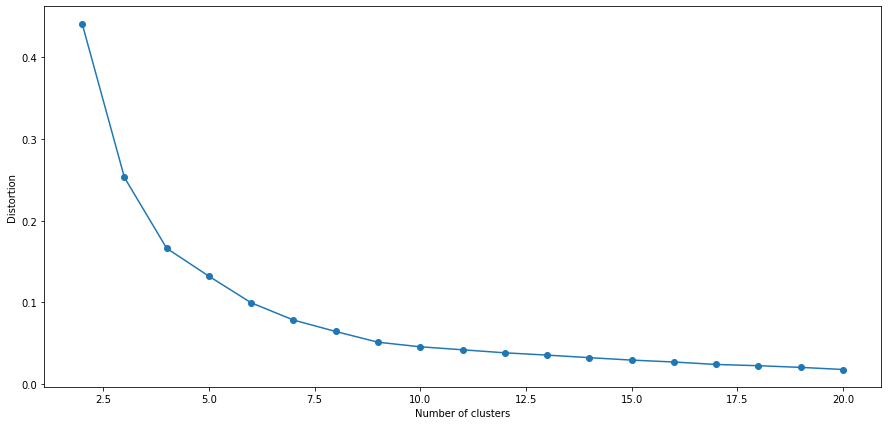

In [81]:
distortions = []
for i in range(2, 21):
  km = KMeans(n_clusters=i, tol=1e-04)
  km = km.fit(coverage[['위도','경도']])
  distortions.append(km.inertia_)
plt.figure(figsize=(15,7))
plt.plot(range(2,21), distortions, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

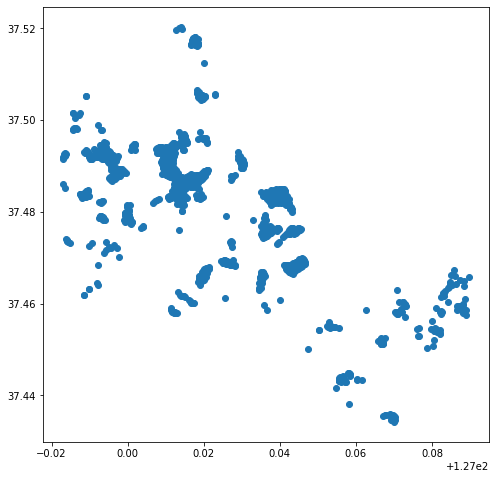

In [82]:
coverage_df = pd.DataFrame(coverage)
coverage_loc = coverage_df[['경도', '위도']]
plt.figure(figsize=(8,8))
plt.scatter(coverage_df['경도'], coverage_df['위도'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


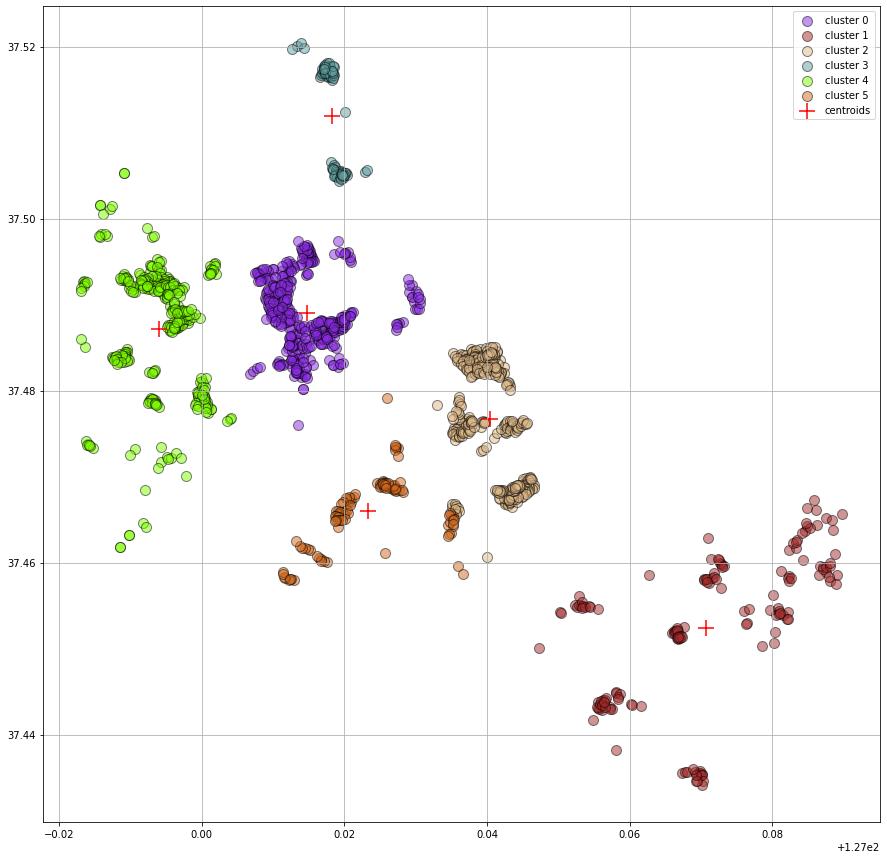

In [83]:
n_clu = 6
km = KMeans(n_clusters=n_clu, random_state=0)
y_km = km.fit_predict(coverage_loc[['경도', '위도']])
plt.figure(figsize=(15,15))
coverage_loc['y_km'] = y_km
for i in range(n_clu):
  plt.scatter(coverage_loc[coverage_loc.y_km == i]['경도'], coverage_loc[coverage_loc.y_km == i]['위도'], 
              c=list(matplotlib.colors.CSS4_COLORS)[i+10], alpha=0.5,marker='o', s=100, edgecolor='black',label='cluster %d'%i)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=250, marker='+', c='red', label='centroids')
plt.legend()
plt.grid()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


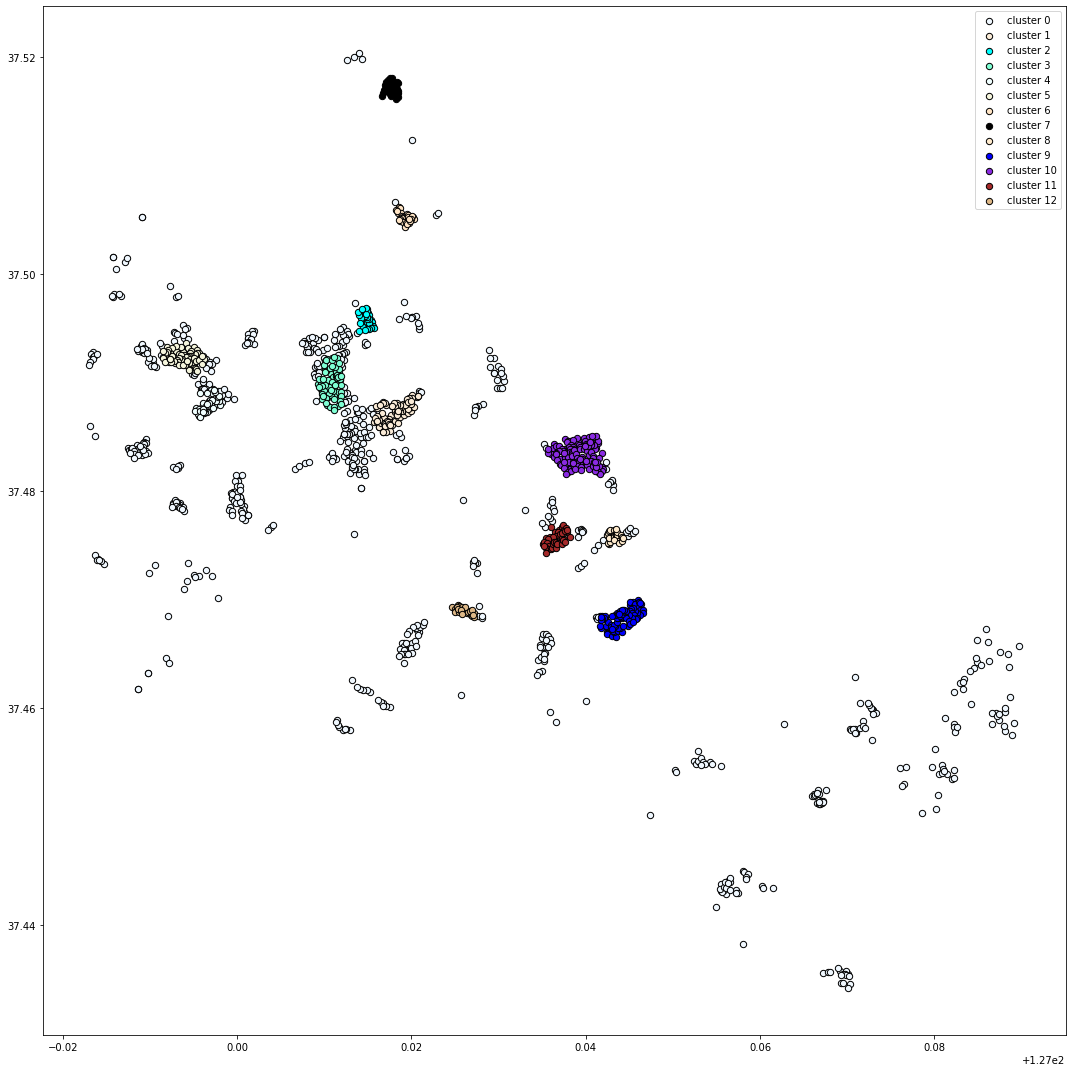

In [84]:
db = DBSCAN(eps=0.001, min_samples=20, metric='euclidean')
y_db = db.fit_predict(coverage_loc[['경도', '위도']])
uni_y = np.unique(y_db)
plt.figure(figsize=(15,15))
coverage_loc['y_db'] = y_db
for i in range(len(uni_y)):
  g = uni_y[i]
  plt.scatter(coverage_loc[coverage_loc.y_db == g]['경도'], coverage_loc[coverage_loc.y_db == g]['위도'],
              c=list(matplotlib.colors.CSS4_COLORS)[i], marker='o', s=40,edgecolor='black',label='cluster %d'%i)
plt.legend()
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


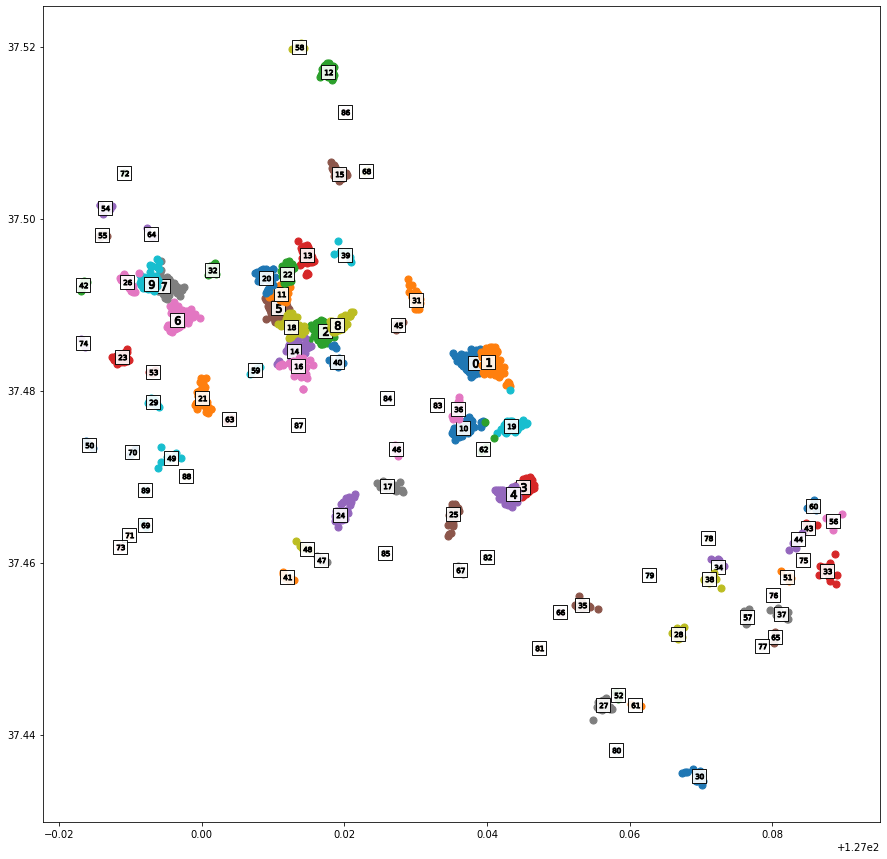

In [85]:
bw = estimate_bandwidth(coverage_loc[['경도', '위도']], quantile=0.01)
ms = MeanShift(bandwidth=bw)
y_ms = ms.fit_predict(coverage_loc[['경도', '위도']])
coverage_loc['y_ms'] = y_ms
centers = ms.cluster_centers_
uniq_y_ms = np.unique(y_ms)
plt.figure(figsize=(15,15))
for label in uniq_y_ms:
  label_cluster = coverage_loc[coverage_loc['y_ms']==label]
  center_x_y = centers[label]
  # 군집별로 다른 marker로 scatter plot 적용
  plt.scatter(x=label_cluster['경도'], y=label_cluster['위도'], s=50, marker='o')
  # 군집별 중심 시각화
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', edgecolor='k',alpha=0.9, marker='s')
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', marker='$%d$' % label)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


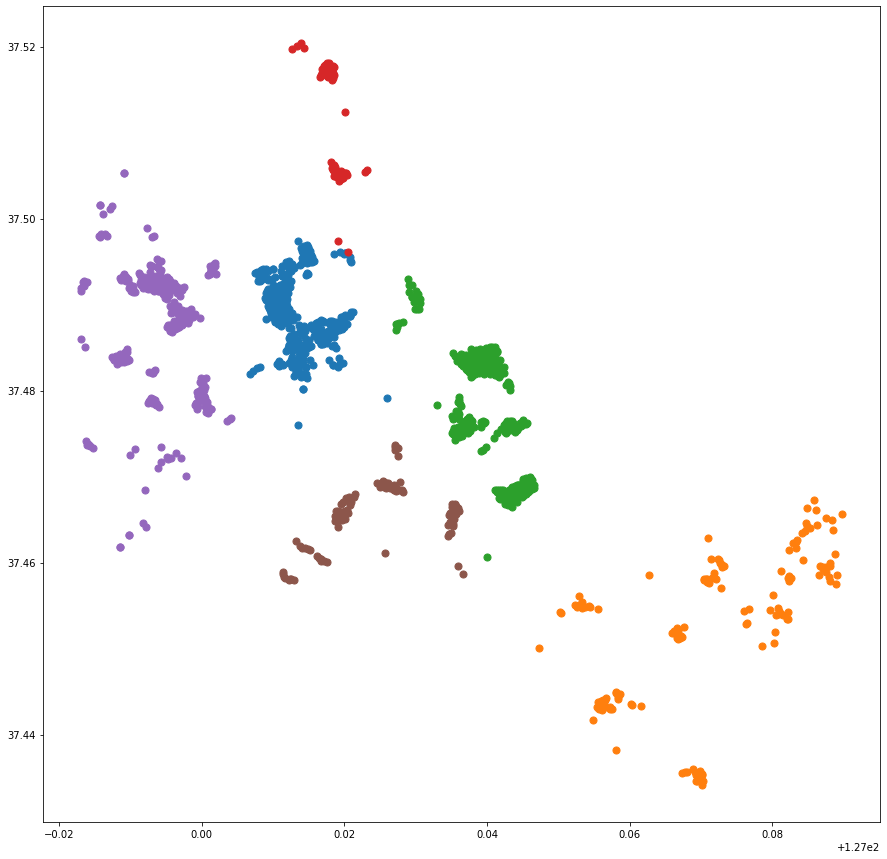

In [86]:
gmm = GaussianMixture(n_components=n_clu, random_state=0)
y_gmm = gmm.fit_predict(coverage_loc[['경도', '위도']])
coverage_loc['y_gmm'] = y_gmm
# centers = gmm.cluster_centers_
uniq_y_gmm = np.unique(y_gmm)
plt.figure(figsize=(15,15))
for label in uniq_y_gmm:
  label_cluster = coverage_loc[coverage_loc['y_gmm']==label]
  # center_x_y = centers[label]
  # 군집별로 다른 marker로 scatter plot 적용
  plt.scatter(x=label_cluster['경도'], y=label_cluster['위도'], s=50, marker='o')
  # 군집별 중심 시각화
  # plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', edgecolor='k',alpha=0.9, marker='s')
  # plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', marker='$%d$' % label)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


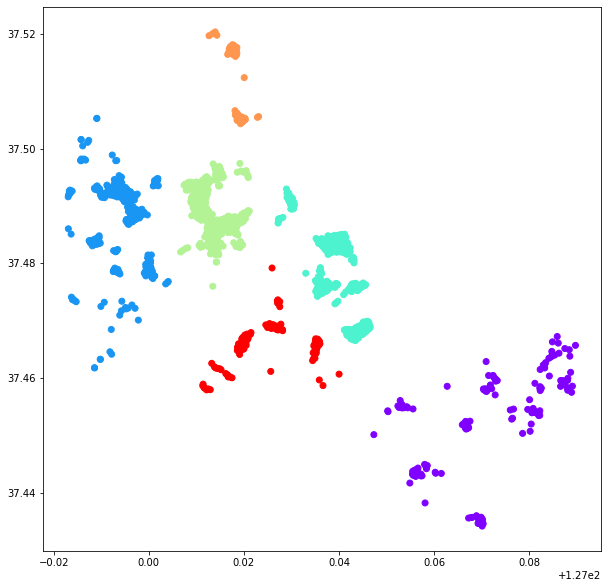

In [87]:
# ward - 각각의 군집 내에서 개체의 중간에 해당하는 점(Center)과 각각의 개체 사이의 거리를 제곱하여 합한 값과(Level 1), 군집을 하나로 묶을 때 모든 개체의 중간에 해당하는 점(Center)과 각각의 개체 사이의 거리를 제곱하여 합한 값(Level 2)를 더한 거리
# Complete - 각각의 군집에서 하나씩 선택한 개체를 연결했을 때 가장 긴 거리
# Single - 각각의 군집에서 하나씩 선택한 개체를 연결했을 때  가장 짧은 거리
# Average linkage각각의 군집에서 하나씩 선택한 개체를 연결한 전체 거리의 평균

hc = AgglomerativeClustering(n_clu, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(coverage_loc[['경도', '위도']])
coverage_loc['y_hc'] = y_hc
plt.figure(figsize=(10,10))
plt.scatter(coverage_loc.iloc[:, 0], coverage_loc.iloc[:, 1], c = y_hc, cmap='rainbow')
plt.show()
# plt.figure(figsize=(10, 7))
# plt.title("Customer Dendograms")
# dend = shc.dendrogram(shc.linkage(coverage_loc, method='ward'))

In [88]:
def silhouette(X, y):
  cluster_labels = np.unique(y)
  n_clusters = cluster_labels.shape[0]
  silhouette_vals = silhouette_samples(X, y, metric='euclidean')
  y_ax_lower, y_ax_upper = 0, 0
  yticks = []
  for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = matplotlib.cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
  silhouette_avg = np.mean(silhouette_vals)
  plt.axvline(silhouette_avg, color="red", linestyle="--")
  plt.yticks(yticks, cluster_labels + 1)
  plt.ylabel('Cluster')
  plt.xlabel('Silhouette coefficient')
  plt.tight_layout()
  plt.show()
  return silhouette_avg

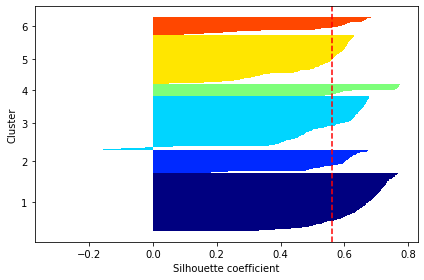

In [89]:
gmm_sil = silhouette(coverage_loc[['경도', '위도']], y_gmm)

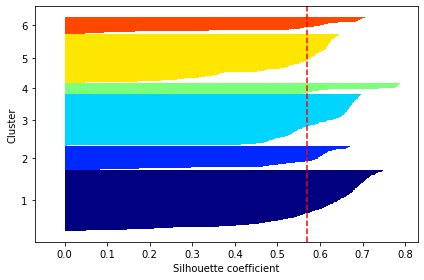

In [90]:
km_sil = silhouette(coverage_loc[['경도', '위도']], y_km)

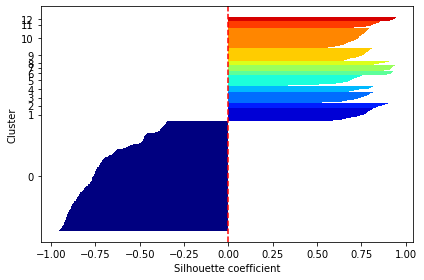

In [91]:
db_sil = silhouette(coverage_loc[['경도', '위도']], y_db)

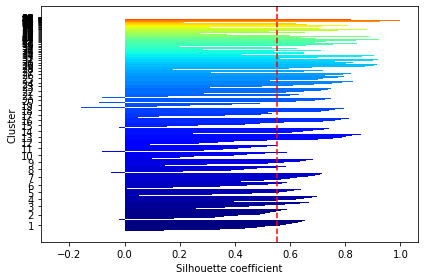

In [92]:
ms_sil = silhouette(coverage_loc[['경도', '위도']], y_ms)

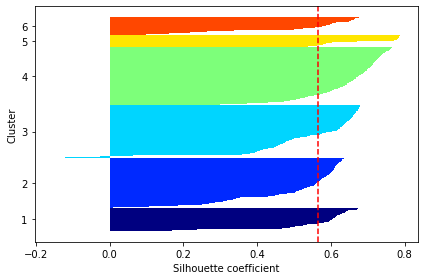

In [93]:
hc_sil = silhouette(coverage_loc[['경도', '위도']], y_hc)

In [94]:
sil_data = [gmm_sil, km_sil, db_sil, ms_sil, hc_sil]
sil_data = pd.DataFrame(sil_data, index = ['GMM', 'KM', 'DB', 'MS', 'HC'], columns = ['silhouette'])
sil_data

,silhouette
GMM,0.563099
KM,0.570340
DB,-0.000791
MS,0.550816
HC,0.564496


In [95]:
coverage_loc

,경도,위도,y_km,y_db,y_ms,y_gmm,y_hc
43,127.019128,37.482748,0,-1,40,0,3
44,127.019415,37.483054,0,-1,40,0,3
45,127.019740,37.483250,0,-1,40,0,3
46,127.018362,37.482969,0,-1,40,0,3
47,127.019280,37.483818,0,-1,40,0,3
...,...,...,...,...,...,...,...
11445,126.988588,37.461779,4,-1,73,4,1
11524,126.996510,37.489029,4,3,6,4,1
11573,127.011199,37.489781,0,2,5,0,3
11586,127.000015,37.479449,4,-1,21,4,1


In [96]:
def get_in_buffer(cd, sd, coverage_range, gu, bd):
  sd_gu = sd[sd.시군구명 == gu]

  cd_gdf = gpd.GeoDataFrame(data = cd, geometry=gpd.points_from_xy(cd.경도, cd.위도), crs='epsg:4326')
  sd_gdf = gpd.GeoDataFrame(data = sd_gu, geometry=gpd.points_from_xy(sd_gu.경도, sd_gu.위도), crs='epsg:4326')

  cd_buffer = cd_gdf.to_crs(epsg=5186).geometry.buffer(coverage_range)
  cd_coverage = cd_buffer.unary_union

  sangga_in_of_coverage = sd_gdf.loc[sd_gdf['geometry'].to_crs(epsg=5186).apply(lambda x: cd_coverage.contains(x))]

  m = folium.Map(location=[37.56, 126.99], zoom_start=11)
  folium.Choropleth(geo_data=bd[bd.sggnm == gu], key_on='feature.properties.adm_nm', fill_color='YlGnBu').add_to(m) #fill_color='YlGnBu', 'PuRd', 'YlOrR
  for _, row in cd_gdf.iterrows():
    folium.Marker([row['위도'], row['경도']]).add_to(m)
  for _, row in sangga_in_of_coverage.iterrows():
    folium.CircleMarker([row['위도'], row['경도']], radius=5, color='red').add_to(m)
  GeoJson(cd_buffer).add_to(m)

  return sangga_in_of_coverage, m

In [97]:
km1, m = get_in_buffer(coverage_loc[coverage_loc.y_km == 0], seocho_sang, 100, '서초구', boundary)

In [103]:
km1

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도,geometry
24,22795034,든든한우家,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,11,서울특별시,11650,서초구,1165053000,서초3동,1165010800,서초동,1165010800215910011,1,대지,1591,11.0,서울특별시 서초구 서초동 1591-11,116504163227,서울특별시 서초구 반포대로16길,30,NaN,1165010800115910011000001,NaN,서울특별시 서초구 반포대로16길 30,137070,6652.0,NaN,2,NaN,127.012363,37.486335,POINT (127.01236 37.48634)
136,24382356,빅&큰,NaN,D,소매,D18,사진/광학/정밀기기소매,D18A02,핸드폰소매,NaN,NaN,11,서울특별시,11650,서초구,1165051000,서초1동,1165010800,서초동,1165010800214450003,1,대지,1445,3.0,서울특별시 서초구 서초동 1445-3,116503121021,서울특별시 서초구 효령로,304,NaN,1165010800114450003024144,국제전자센터,서울특별시 서초구 효령로 304,137728,6720.0,NaN,5,NaN,127.017789,37.484722,POINT (127.01779 37.48472)
162,28494447,아트호텔,NaN,O,숙박,O01,호텔/콘도,O01A01,호텔/콘도,NaN,NaN,11,서울특별시,11650,서초구,1165053000,서초3동,1165010800,서초동,1165010800215930004,1,대지,1593,4.0,서울특별시 서초구 서초동 1593-4,116504163646,서울특별시 서초구 효령로53길,53,NaN,1165010800115930004021908,ARTHOTEL,서울특별시 서초구 효령로53길 53,137070,6652.0,NaN,1,NaN,127.012875,37.486952,POINT (127.01288 37.48695)
205,23611162,라브리,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,11,서울특별시,11650,서초구,1165053000,서초3동,1165010800,서초동,1165010800215590009,1,대지,1559,9.0,서울특별시 서초구 서초동 1559-9,116504163233,서울특별시 서초구 반포대로22길,64,NaN,1165010800115590009025239,NaN,서울특별시 서초구 반포대로22길 64,137070,6649.0,NaN,1,NaN,127.011892,37.490332,POINT (127.01189 37.49033)
224,24340965,로텔,NaN,D,소매,D12,가전제품소매,D12A01,일반가전제품,G47320,가전제품 소매업,11,서울특별시,11650,서초구,1165051000,서초1동,1165010800,서초동,1165010800214450003,1,대지,1445,3.0,서울특별시 서초구 서초동 1445-3,116503121021,서울특별시 서초구 효령로,304,NaN,1165010800114450003024144,국제전자센터,서울특별시 서초구 효령로 304,137728,6720.0,NaN,4,NaN,127.017789,37.484722,POINT (127.01779 37.48472)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315410,24861007,카라트,NaN,F,생활서비스,F14,자동차/이륜차,F14A01,자동차정비/카센타,NaN,NaN,11,서울특별시,11650,서초구,1165051000,서초1동,1165010800,서초동,1165010800216300005,1,대지,1630,5.0,서울특별시 서초구 서초동 1630-5,116503121014,서울특별시 서초구 사임당로,98,NaN,1165010800116300005023679,VOLVO대리점,서울특별시 서초구 사임당로 98,137070,6642.0,1,1,NaN,127.020672,37.489972,POINT (127.02067 37.48997)
315487,22561378,빼빼앤쌀레,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,11,서울특별시,11650,서초구,1165053100,서초4동,1165010800,서초동,1165010800216850003,1,대지,1685,3.0,서울특별시 서초구 서초동 1685-3,116503121024,서울특별시 서초구 서초중앙로,188,NaN,1165010800116850003020236,아크로비스타,서울특별시 서초구 서초중앙로 188,137921,6600.0,NaN,1,NaN,127.013720,37.497502,POINT (127.01372 37.49750)
315678,22863747,메를로,NaN,Q,음식,Q06,양식,Q06A01,정통양식/경양식,I56114,서양식 음식점업,11,서울특별시,11650,서초구,1165051000,서초1동,1165010800,서초동,1165010800216780004,1,대지,1678,4.0,서울특별시 서초구 서초동 1678-4,116502121002,서울특별시 서초구 서초대로,356,NaN,1165010800116780004000001,서초지웰타워,서울특별시 서초구 서초대로 356,137070,6631.0,NaN,1,NaN,127.020228,37.495402,POINT (127.02023 37.49540)
315846,22902694,링컨로펌,NaN,F,생활서비스,F19,법무세무회계,F19B01,법무관련서비스-종합,NaN,NaN,11,서울특별시,11650,서초구,1165053000,서초3동,1165010800,서초동,1165010800217110000,1,대지,1711,NaN,서울특별시 서초구 서초동 1711,116503121013,서울특별시 서초구 법원로,10,NaN,1165010800117110000021786,정곡빌딩남관,서울특별시 서초구 법원로 10,137070,6596.0,NaN,3,NaN,127.011111,37.493848,POINT (127.01111 37.49385)


In [98]:
coverage_loc[coverage_loc.y_km == 0] 

,경도,위도,y_km,y_db,y_ms,y_gmm,y_hc
43,127.019128,37.482748,0,-1,40,0,3
44,127.019415,37.483054,0,-1,40,0,3
45,127.019740,37.483250,0,-1,40,0,3
46,127.018362,37.482969,0,-1,40,0,3
47,127.019280,37.483818,0,-1,40,0,3
...,...,...,...,...,...,...,...
11237,127.011971,37.490602,0,2,11,0,3
11301,127.016032,37.486468,0,0,2,0,3
11374,127.019415,37.483054,0,-1,40,0,3
11573,127.011199,37.489781,0,2,5,0,3


In [107]:
def kmeans_clustering(n_clu, x_data, elbow=False, graph=False):
  if elbow:
    distortions = []
    for i in range(2, 11):
      kms = KMeans(n_clusters=i)
      kms = kms.fit(x_data)
      distortions.append(kms.inertia_)
    plt.figure(figsize=(10,6))
    plt.plot(range(2, 11), distortions, marker = 'o')
    plt.show()

  kms = KMeans(n_clusters=n_clu)
  y_kms = kms.fit_predict(x_data)
  
  if graph:
    plt.figure(figsize=(10,6))
    plt.scatter(x_data.경도, x_data.위도, c=y_kms, cmap='rainbow')
    plt.scatter(kms.cluster_centers_[:,1], kms.cluster_centers_[:,0], marker='+', c='red', label='centroids')
    plt.show()
  
  return kms.cluster_centers_

In [108]:
center = kmeans_clustering(5, coverage_loc[coverage_loc.y_km == 0][['위도','경도']], elbow=False, graph=False)

In [101]:
coverage_loc[coverage_loc.y_km == 0][['위도','경도']]

,위도,경도
43,37.482748,127.019128
44,37.483054,127.019415
45,37.483250,127.019740
46,37.482969,127.018362
47,37.483818,127.019280
...,...,...
11237,37.490602,127.011971
11301,37.486468,127.016032
11374,37.483054,127.019415
11573,37.489781,127.011199


In [110]:
center[0]

array([ 37.49085961, 127.01056314])

In [105]:
def distance(p1, p2):
  return math.sqrt((p2[0] - p1[0]) ** 2 + (p2[1] - p1[1]) ** 2)